Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-248.306,-257.938,2.39506e-78
2,140.151,4.0,-245.316,-254.934,4.82989e-77
3,140.302,4.0,-242.355,-251.958,9.46665e-76
4,140.452,4.0,-239.422,-249.011,1.8034e-74
5,140.603,4.0,-236.518,-246.092,3.33908e-73
6,140.754,4.0,-233.642,-243.202,6.00896e-72
7,140.905,4.0,-230.794,-240.341,1.05101e-70
8,141.055,4.0,-227.975,-237.507,1.78672e-69
9,141.206,4.0,-225.184,-234.703,2.95217e-68


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,158.09,8.66332,-71.4251,-79.7473,0.583983
2,156.281,8.26131,-70.7981,-79.2145,0.994995
3,155.377,8.74372,-70.8665,-79.3329,0.883849
4,154.925,8.26131,-70.9324,-79.4247,0.806321
5,152.965,7.9397,-72.2325,-80.8427,0.1953
6,159.296,9.86935,-72.45,-80.7139,0.222127
7,158.844,10.1106,-72.2655,-80.5509,0.261471
8,157.186,7.29648,-71.4562,-79.8244,0.540665
9,157.186,7.45729,-71.3235,-79.6917,0.617375


### Snippet 4.23

Density of sigma

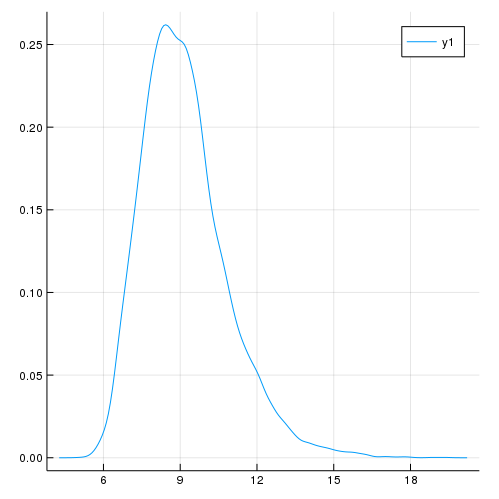

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*